In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
data = pd.read_csv('pre_process(vader).csv')

#Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [ ]:
bow_vectorizer = CountVectorizer(max_df = 0.90, min_df=2, max_features = 50000, stop_words='english')

bow = bow_vectorizer.fit_transform(data['clean_tweet'])

bow.shape

(254626, 41205)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.90, min_df=2, max_features = 50000, stop_words='english')

tfidf = tfidf_vectorizer.fit_transform(data['clean_tweet'])

tfidf.shape

(254626, 41205)

#Dataset Spliting

In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(bow, data['sentiment'], test_size = 0.20, random_state = 0)

print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(203700, 41205)
(203700,)
(50926, 41205)
(50926,)


In [ ]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(tfidf, data['sentiment'], test_size = 0.20, random_state = 0)

print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(203700, 41205)
(203700,)
(50926, 41205)
(50926,)


In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Logistic Regression

Confusion matrix, without normalization
[[23252   201   336]
 [   96  7084    88]
 [  364   201 19304]]
Normalized confusion matrix
[[0.98 0.01 0.01]
 [0.01 0.97 0.01]
 [0.02 0.01 0.97]]


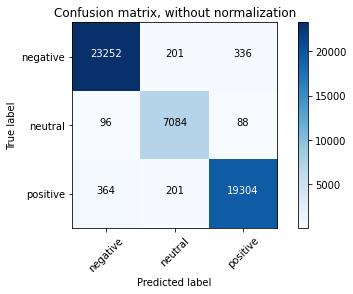

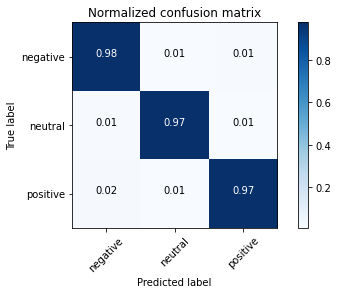

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cnf_matrix = confusion_matrix(y1_test,y1_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y1_test, y1_pred))

Acurracy =  0.9747476730942937


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     23789
           1       0.95      0.97      0.96      7268
           2       0.98      0.97      0.98     19869

    accuracy                           0.97     50926
   macro avg       0.97      0.97      0.97     50926
weighted avg       0.97      0.97      0.97     50926



Confusion matrix, without normalization
[[23168   188   433]
 [  295  6723   250]
 [  541   202 19126]]
Normalized confusion matrix
[[0.97 0.01 0.02]
 [0.04 0.93 0.03]
 [0.03 0.01 0.96]]


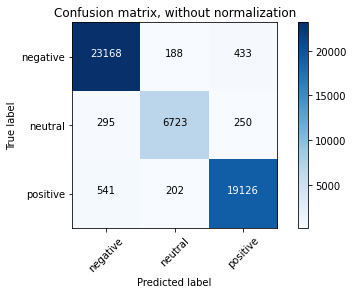

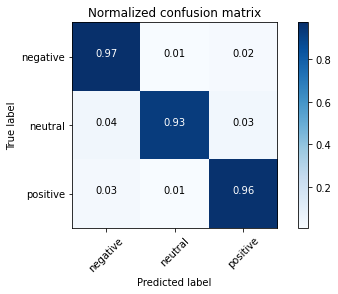

In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cnf_matrix = confusion_matrix(y2_test,y2_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y2_test, y2_pred))

Acurracy =  0.962514236342929


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     23789
           1       0.95      0.93      0.93      7268
           2       0.97      0.96      0.96     19869

    accuracy                           0.96     50926
   macro avg       0.96      0.95      0.96     50926
weighted avg       0.96      0.96      0.96     50926



#Naive Bayes

Confusion matrix, without normalization
[[22169   454  1166]
 [  981  5701   586]
 [ 1951   592 17326]]
Normalized confusion matrix
[[0.93 0.02 0.05]
 [0.13 0.78 0.08]
 [0.1  0.03 0.87]]


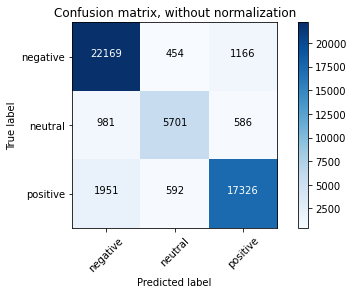

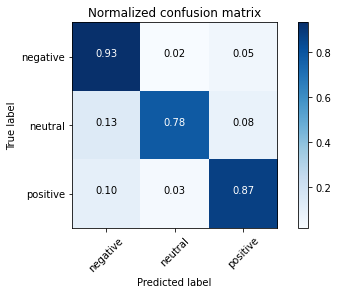

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model = MultinomialNB()
model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cnf_matrix = confusion_matrix(y1_test,y1_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y1_test, y1_pred))

Acurracy =  0.8874838000235636


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     23789
           1       0.84      0.78      0.81      7268
           2       0.91      0.87      0.89     19869

    accuracy                           0.89     50926
   macro avg       0.88      0.86      0.87     50926
weighted avg       0.89      0.89      0.89     50926



Confusion matrix, without normalization
[[22481   177  1131]
 [ 1673  4742   853]
 [ 2231   207 17431]]
Normalized confusion matrix
[[0.95 0.01 0.05]
 [0.23 0.65 0.12]
 [0.11 0.01 0.88]]


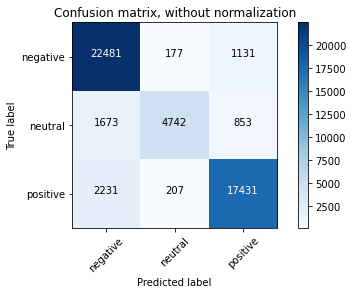

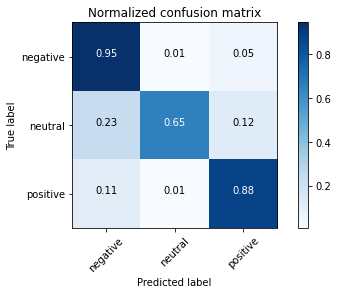

In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cnf_matrix = confusion_matrix(y2_test,y2_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y2_test, y2_pred))

Acurracy =  0.876840906413227


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     23789
           1       0.93      0.65      0.77      7268
           2       0.90      0.88      0.89     19869

    accuracy                           0.88     50926
   macro avg       0.89      0.82      0.85     50926
weighted avg       0.88      0.88      0.87     50926



#Decision Tree

Confusion matrix, without normalization
[[22743   409   637]
 [  234  6863   171]
 [  585   364 18920]]
Normalized confusion matrix
[[0.96 0.02 0.03]
 [0.03 0.94 0.02]
 [0.03 0.02 0.95]]


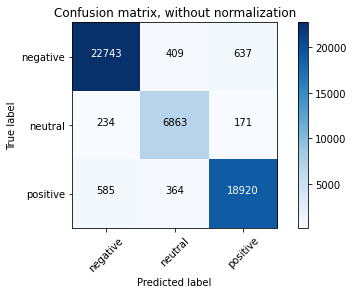

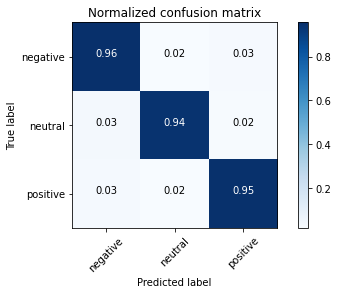

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

model.fit(X1_train, y1_train)

y1_pred = model.predict(X1_test)

cnf_matrix = confusion_matrix(y1_test,y1_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y1_test, y1_pred))

Acurracy =  0.9528727958213878


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96     23789
           1       0.90      0.94      0.92      7268
           2       0.96      0.95      0.96     19869

    accuracy                           0.95     50926
   macro avg       0.94      0.95      0.95     50926
weighted avg       0.95      0.95      0.95     50926



Confusion matrix, without normalization
[[22549   478   762]
 [  361  6614   293]
 [  742   423 18704]]
Normalized confusion matrix
[[0.95 0.02 0.03]
 [0.05 0.91 0.04]
 [0.04 0.02 0.94]]


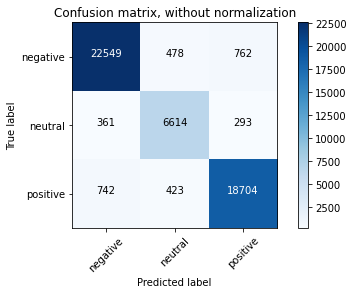

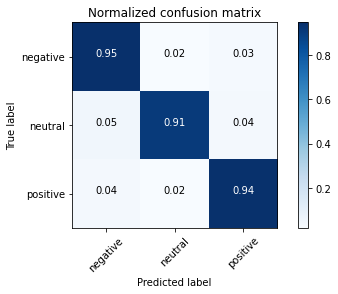

In [ ]:
model.fit(X2_train, y2_train)

y2_pred = model.predict(X2_test)

cnf_matrix = confusion_matrix(y2_test,y2_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y2_test, y2_pred))

Acurracy =  0.939932451007344


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     23789
           1       0.88      0.91      0.89      7268
           2       0.95      0.94      0.94     19869

    accuracy                           0.94     50926
   macro avg       0.93      0.93      0.93     50926
weighted avg       0.94      0.94      0.94     50926



#SVM

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Confusion matrix, without normalization
[[23308   156   325]
 [  104  7040   124]
 [  354   174 19341]]
Normalized confusion matrix
[[0.98 0.01 0.01]
 [0.01 0.97 0.02]
 [0.02 0.01 0.97]]


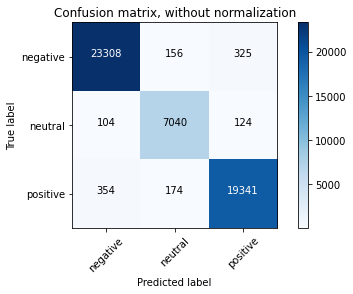

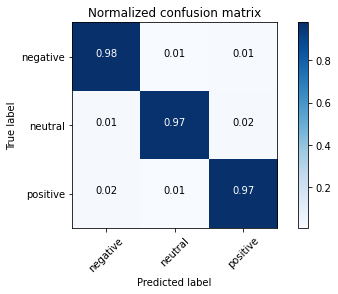

In [ ]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X1_train,y1_train)
y1_pred=clf.predict(X1_test)

cnf_matrix = confusion_matrix(y1_test,y1_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y1_test, y1_pred))

Acurracy =  0.9757098535129404


In [ ]:
print(classification_report(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     23789
           1       0.96      0.97      0.96      7268
           2       0.98      0.97      0.98     19869

    accuracy                           0.98     50926
   macro avg       0.97      0.97      0.97     50926
weighted avg       0.98      0.98      0.98     50926



Confusion matrix, without normalization
[[23301   168   320]
 [  161  6953   154]
 [  377   186 19306]]
Normalized confusion matrix
[[0.98 0.01 0.01]
 [0.02 0.96 0.02]
 [0.02 0.01 0.97]]


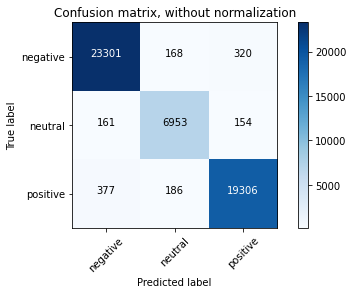

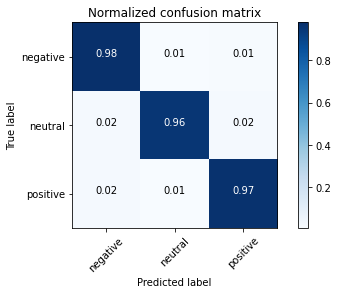

In [ ]:
clf.fit(X2_train,y2_train)
y2_pred=clf.predict(X2_test)

cnf_matrix = confusion_matrix(y2_test,y2_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["negative",'neutral',"positive"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
print('Acurracy = ' ,metrics.accuracy_score(y2_test, y2_pred))

Acurracy =  0.97188054730823


In [ ]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29610
           1       0.95      0.96      0.95      9149
           2       0.98      0.97      0.97     24898

    accuracy                           0.97     63657
   macro avg       0.97      0.97      0.97     63657
weighted avg       0.97      0.97      0.97     63657



#Bar Diagram

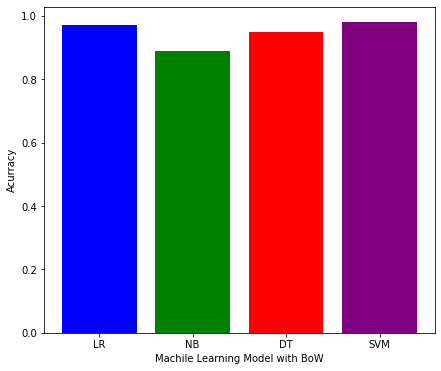

In [5]:
x = ['LR', 'NB', 'DT', 'SVM']
y = [0.97,0.89,0.95,0.98]

plt.figure(figsize=(7,6))

plt.bar(x, y, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Machile Learning Model with BoW')
plt.ylabel('Acurracy')
plt.show()

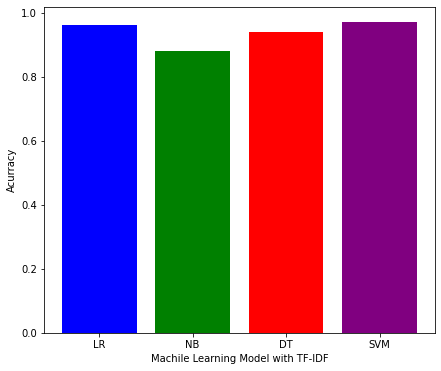

In [6]:
x = ['LR', 'NB', 'DT', 'SVM']
y = [0.96,0.88,0.94,0.97]

plt.figure(figsize=(7,6))

plt.bar(x, y, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Machile Learning Model with TF-IDF')
plt.ylabel('Acurracy')
plt.show()